<a href="https://colab.research.google.com/github/trantoan62/AI-CNN-TranQuocToan/blob/main/VND_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers.pooling import MaxPooling2D
from keras.backend import conv2d
from keras.layers import Conv2D,MaxPooling2D,Dropout
from keras.layers.core.flatten import Flatten
from tensorflow.keras.optimizers import SGD
from keras.models import load_model
import plotly.graph_objects as go
from keras.preprocessing.image import load_img, img_to_array

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
train_path = '/content/drive/MyDrive/VND_images/train'
test_path = '/content/drive/MyDrive/VND_images/test'

In [8]:
X_train = ImageDataGenerator(rescale=1/255)
X_test = ImageDataGenerator(rescale=1/255)

In [9]:
train_dataset = X_train.flow_from_directory(
    directory=r"/content/drive/MyDrive/VND_images/train",
    target_size=(200, 200),
    batch_size=3,
    class_mode="categorical",
    )
test_dataset = X_test.flow_from_directory(
    directory=r"/content/drive/MyDrive/VND_images/test",
    target_size=(200, 200),
    batch_size=3,
    class_mode= "categorical",
    )

Found 452 images belonging to 9 classes.
Found 238 images belonging to 9 classes.


In [10]:
train_dataset.classes
train_dataset.class_indices

{'1 1k': 0,
 '2 2k': 1,
 '3 5k': 2,
 '4 10k': 3,
 '5 20k': 4,
 '6 50k': 5,
 '7 100k': 6,
 '8 200k': 7,
 '9 500k': 8}

In [11]:
model = Sequential([
    Conv2D(16,3, padding='same', activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D(),
    Conv2D(32,3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64,3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128,3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(128,3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(9, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 50, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 25, 25, 64)       0

In [12]:
model.compile(loss = ['categorical_crossentropy'], 
              optimizer = 'Adam', 
              metrics = ['accuracy'])

In [13]:
history=model.fit(train_dataset, epochs=20, batch_size=64, verbose=1, validation_data= test_dataset)

Epoch 1/20
151/151 [==============================] - 370s 2s/step - loss: 2.1860 - accuracy: 0.1637 - val_loss: 2.1549 - val_accuracy: 0.1513
Epoch 2/20
151/151 [==============================] - 125s 831ms/step - loss: 2.1630 - accuracy: 0.1637 - val_loss: 2.1615 - val_accuracy: 0.1513
Epoch 3/20
151/151 [==============================] - 125s 828ms/step - loss: 2.1250 - accuracy: 0.1969 - val_loss: 2.0457 - val_accuracy: 0.2353
Epoch 4/20
151/151 [==============================] - 125s 827ms/step - loss: 1.4042 - accuracy: 0.4381 - val_loss: 1.9715 - val_accuracy: 0.2395
Epoch 5/20
151/151 [==============================] - 123s 814ms/step - loss: 1.0824 - accuracy: 0.5177 - val_loss: 1.1540 - val_accuracy: 0.5126
Epoch 6/20
151/151 [==============================] - 123s 818ms/step - loss: 0.8856 - accuracy: 0.5929 - val_loss: 1.0603 - val_accuracy: 0.5504
Epoch 7/20
151/151 [==============================] - 131s 867ms/step - loss: 0.7974 - accuracy: 0.6504 - val_loss: 1.1975 - va

In [14]:
model.save('VND_images.h5')

In [15]:
labels = {0: '1000 VND',
1: '2000 VND',
2: '5000 VND',
3: '10000 VND',
4: '20000 VND',
5: '50000 VND',
6: '100000 VND',
7: '200000 VND',
8: '500000 VND'}

This is:  5000 VND


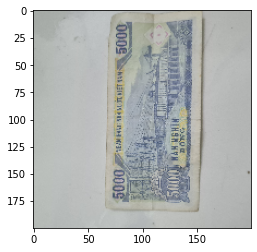

In [16]:
img = load_img('/content/5k.jpg', target_size =(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
img.shape
val = model.predict(img)
np.argmax(val,axis= 1)
print('This is: ', labels[np.argmax(val)])

This is:  20000 VND


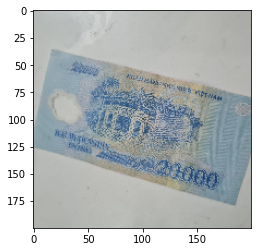

In [17]:
img = load_img('/content/20k.jpg', target_size =(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
img.shape
val = model.predict(img)
np.argmax(val,axis= 1)
print('This is: ', labels[np.argmax(val)])

This is:  500000 VND


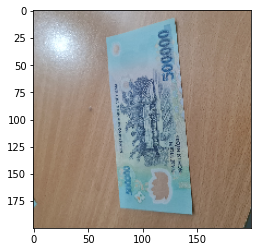

In [18]:
img = load_img('/content/500k.jpg', target_size =(200,200))
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3)
img = img.astype('float32')
img = img/255
img.shape
val = model.predict(img)
np.argmax(val,axis= 1)
print('This is: ', labels[np.argmax(val)])